## Observations and Insights

The first observation that is immediately obvious (for context: refer to the summary statistic table), is that mice subjected to the Capomulin and Ramicane drug regimens had the lowest mean and median Tumor Volumes; from this, we can infer that those two drug regimens were the most effective if using Tumor Volume as a measure of success/potential of a drug regimen. Those two drug regimens also had the lowest Variance and Standard Deviation, so there was less statistical variability in those two groups than in any of the other drug regimens used in treatment. 
The second observation I made is that when looking at the line graph that focused on mouse 1509, tumor volume reached maximum on the 20th day of treatment, then began a fairly steady decrease through the 34th day of treatment, before tumor volume began to increase again. That may indicate that the treatment takes about 20 days to reach a level within the body where tumor volume will begin to decrease, but the efficacy of the treatment may be short-lived, as after two weeks, tumor volume decrease halted. This could mean that Capomulin may be a good first treatment option, but there may be a need to switch treatments or supplement Capomulin with a secondary medication if test results show that a patient tumor volume has resumed growth. 
My final observation is based on the correlation between mouse weight and tumor volume- the correlation data and linear regression graph suggest that there is a very significant correlation between these two factors. I'm not aware of what weight is considered "healthy" for a mouse, but the data suggests that as a mouse gains weight, and possibly reaches an unhealthy or obese weight, the likelihood of their tumor volume being higher is very high. Inversely, by maintaining a lower weight, it's more likely that the tumor volume would also be lower. If this data could be extrapolated to a study on humans dealing with SCC, with the prevalence of overweight and obese people in the U.S., and across the world, this information could be vital if the results of this animal study are referenced in the event of human clinical trials for SCC treatment. It would be important to understand the effects of subject weight on tumor volume, and if that is a factor to be considered when adjusting dosage of the drug regimen treatment. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df)
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#Remove duplicates from combined data
merged_clean_df = merged_df.drop_duplicates()
merged_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Split up our data into groups based upon 'Drug Regimen'
merged_data_grouped = merged_clean_df.groupby("Drug Regimen")

merged_mean = merged_data_grouped["Tumor Volume (mm3)"].mean()
merged_median = merged_data_grouped["Tumor Volume (mm3)"].median()
merged_var = merged_data_grouped["Tumor Volume (mm3)"].var()
merged_std = merged_data_grouped["Tumor Volume (mm3)"].std()
merged_sem = merged_data_grouped["Tumor Volume (mm3)"].sem()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merged_summary_df = pd.DataFrame({"Mean":merged_mean, "Median":merged_median, "Variance": merged_var, "Standard Deviation": merged_std, "SEM": merged_sem})
merged_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

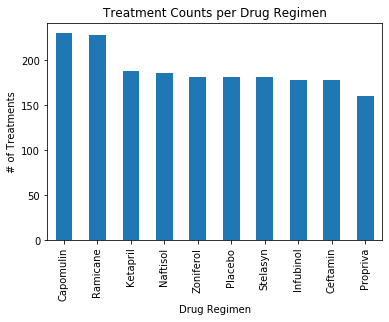

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
dregimen_bar = merged_clean_df["Drug Regimen"].value_counts()
dregimen_bar.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Treatments")
plt.title("Treatment Counts per Drug Regimen")
plt.show()


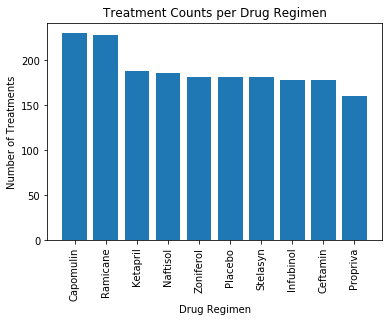

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

dregimen_bar = merged_clean_df["Drug Regimen"].value_counts()
x_axis = dregimen_bar.index.values
plt.bar(x_axis, dregimen_bar.values)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Treatments")
plt.title("Treatment Counts per Drug Regimen")
plt.show()

## Pie plots

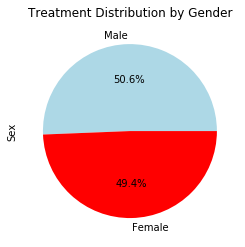

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Pie chart variables
dregimen_pie = merged_clean_df["Sex"].value_counts()
labels = dregimen_pie.index.values
sizes = dregimen_pie.values
colors = ["lightblue", "red"]
#Plot the pie chart
dregimen_pie.plot(kind = "pie",autopct='%1.1f%%', colors= colors)
plt.title("Treatment Distribution by Gender")
plt.show()


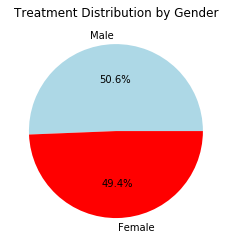

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%")
plt.title("Treatment Distribution by Gender")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# Most promising regimens are Capomulin, Ramicane, Infubinol, Ceftamin

finalTumorVol_df = merged_clean_df.groupby("Mouse ID")["Timepoint"].max().to_frame().reset_index()
finalTumorVol_df.head()

top4_merged_df = pd.merge(finalTumorVol_df, merged_clean_df, on=("Mouse ID","Timepoint"))
top4_merged_df.head(20)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [9]:
#Calculate boxplot data for Capomulin
tumVol_Capomulin_df = top4_merged_df.loc[top4_merged_df["Drug Regimen"] == "Capomulin"]
tumVol_Capomulin_df = tumVol_Capomulin_df[["Tumor Volume (mm3)"]]
quartilesCap = tumVol_Capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_Cap = quartilesCap[0.25]
upperq_Cap = quartilesCap[0.75]
iqr_Cap = upperq_Cap-lowerq_Cap
lower_bound_Cap = lowerq_Cap - (1.5*iqr_Cap)
upper_bound_Cap = upperq_Cap + (1.5*iqr_Cap)

print(f"The lower quartile of Final Tumor Volume for Capomulin is: {lowerq_Cap}")
print(f"The upper quartile of Final Tumor Volume for Capomulin is: {upperq_Cap}")
print(f"The interquartile range of Final Tumor Volume for Capomulin is: {iqr_Cap}")
print(f"The the median of Final Tumor Volume for Capomulin is: {quartilesCap[0.5]} ")
print(f"Values below {lower_bound_Cap} are potential outliers.")
print(f"Values above {upper_bound_Cap} are potential outliers.")

The lower quartile of Final Tumor Volume for Capomulin is: 32.37735684
The upper quartile of Final Tumor Volume for Capomulin is: 40.1592203
The interquartile range of Final Tumor Volume for Capomulin is: 7.781863460000004
The the median of Final Tumor Volume for Capomulin is: 38.125164399999996 
Values below 20.70456164999999 are potential outliers.
Values above 51.83201549 are potential outliers.


In [10]:
#Calculate boxplot data for Ramicane
tumVol_Ramicane_df = top4_merged_df.loc[top4_merged_df["Drug Regimen"] == "Ramicane"]
tumVol_Ramicane_df = tumVol_Ramicane_df[["Tumor Volume (mm3)"]]
quartilesRam = tumVol_Ramicane_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_Ram = quartilesRam[0.25]
upperq_Ram = quartilesRam[0.75]
iqr_Ram = upperq_Ram-lowerq_Ram
lower_bound_Ram = lowerq_Ram - (1.5*iqr_Ram)
upper_bound_Ram = upperq_Ram + (1.5*iqr_Ram)

print(f"The lower quartile of Final Tumor Volume for Ramicane is: {lowerq_Ram}")
print(f"The upper quartile of Final Tumor Volume for Ramicane is: {upperq_Ram}")
print(f"The interquartile range of Final Tumor Volume for Ramicane is: {iqr_Ram}")
print(f"The the median of Final Tumor Volume for Ramicane is: {quartilesRam[0.5]} ")
print(f"Values below {lower_bound_Ram} are potential outliers.")
print(f"Values above {upper_bound_Ram} are potential outliers.")

The lower quartile of Final Tumor Volume for Ramicane is: 31.56046955
The upper quartile of Final Tumor Volume for Ramicane is: 40.65900627
The interquartile range of Final Tumor Volume for Ramicane is: 9.098536719999998
The the median of Final Tumor Volume for Ramicane is: 36.56165229 
Values below 17.912664470000003 are potential outliers.
Values above 54.30681135 are potential outliers.


In [11]:
#Calculate boxplot data for Infubinol
tumVol_Infubinol_df = top4_merged_df.loc[top4_merged_df["Drug Regimen"] == "Infubinol"]
tumVol_Infubinol_df = tumVol_Infubinol_df[["Tumor Volume (mm3)"]]
quartilesInf = tumVol_Infubinol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_Inf = quartilesInf[0.25]
upperq_Inf = quartilesInf[0.75]
iqr_Inf = upperq_Inf-lowerq_Inf
lower_bound_Inf = lowerq_Inf - (1.5*iqr_Inf)
upper_bound_Inf = upperq_Inf + (1.5*iqr_Inf)

print(f"The lower quartile of Final Tumor Volume for Infubinol is: {lowerq_Inf}")
print(f"The upper quartile of Final Tumor Volume for Infubinol is: {upperq_Inf}")
print(f"The interquartile range of Final Tumor Volume for Infubinol is: {iqr_Inf}")
print(f"The the median of Final Tumor Volume for Infubinol is: {quartilesInf[0.5]} ")
print(f"Values below {lower_bound_Inf} are potential outliers.")
print(f"Values above {upper_bound_Inf} are potential outliers.")

The lower quartile of Final Tumor Volume for Infubinol is: 54.04860769
The upper quartile of Final Tumor Volume for Infubinol is: 65.52574285
The interquartile range of Final Tumor Volume for Infubinol is: 11.477135160000003
The the median of Final Tumor Volume for Infubinol is: 60.16518046 
Values below 36.83290494999999 are potential outliers.
Values above 82.74144559000001 are potential outliers.


In [12]:
#Calculate boxplot data for Ceftamin
tumVol_Ceftamin_df = top4_merged_df.loc[top4_merged_df["Drug Regimen"] == "Ceftamin"]
tumVol_Ceftamin_df = tumVol_Ceftamin_df[["Tumor Volume (mm3)"]]
quartilesCef = tumVol_Ceftamin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_Cef = quartilesCef[0.25]
upperq_Cef = quartilesCef[0.75]
iqr_Cef = upperq_Cef-lowerq_Cef
lower_bound_Cef = lowerq_Cef - (1.5*iqr_Cef)
upper_bound_Cef = upperq_Cef + (1.5*iqr_Cef)

print(f"The lower quartile of Final Tumor Volume for Ceftamin is: {lowerq_Cef}")
print(f"The upper quartile of Final Tumor Volume for Ceftamin is: {upperq_Cef}")
print(f"The interquartile range of Final Tumor Volume for Ceftamin is: {iqr_Cef}")
print(f"The the median of Final Tumor Volume for Ceftamin is: {quartilesCef[0.5]} ")
print(f"Values below {lower_bound_Cef} are potential outliers.")
print(f"Values above {upper_bound_Cef} are potential outliers.")

The lower quartile of Final Tumor Volume for Ceftamin is: 48.72207785
The upper quartile of Final Tumor Volume for Ceftamin is: 64.29983003
The interquartile range of Final Tumor Volume for Ceftamin is: 15.577752179999997
The the median of Final Tumor Volume for Ceftamin is: 59.85195552 
Values below 25.355449580000002 are potential outliers.
Values above 87.66645829999999 are potential outliers.


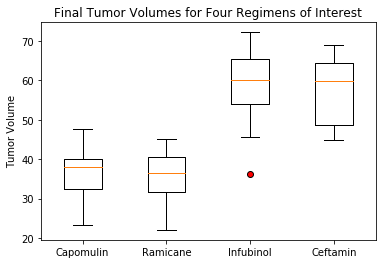

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_circle = dict(markerfacecolor='r')
fig1, ax1 = plt.subplots()
plotlist = [tumVol_Capomulin_df["Tumor Volume (mm3)"],tumVol_Ramicane_df["Tumor Volume (mm3)"],tumVol_Infubinol_df["Tumor Volume (mm3)"],tumVol_Ceftamin_df["Tumor Volume (mm3)"]]
labels=["Capomulin","Ramicane","Infubinol","Ceftamin"]
ax1.boxplot(plotlist,labels=labels, flierprops=red_circle)
ax1.set_title('Final Tumor Volumes for Four Regimens of Interest')
ax1.set_ylabel('Tumor Volume')
plt.show()


## Line and scatter plots

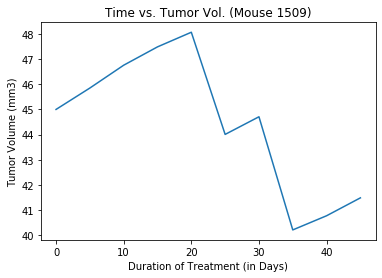

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin (mouse 1509)
mouse1509 = merged_clean_df.loc[merged_clean_df["Mouse ID"] == "l509"]
plt.plot(mouse1509["Timepoint"],mouse1509["Tumor Volume (mm3)"])
plt.title("Time vs. Tumor Vol. (Mouse 1509)")
plt.xlabel("Duration of Treatment (in Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


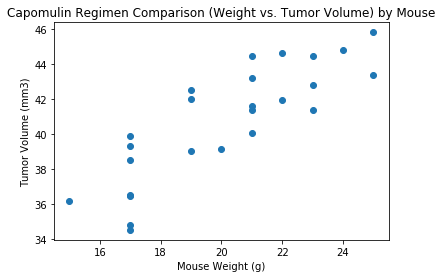

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Cap_Weight_AvgTumVol_df = merged_clean_df.loc[merged_clean_df["Drug Regimen"] == "Capomulin"]
Cap_Means_df = Cap_Weight_AvgTumVol_df.groupby("Mouse ID").mean()

plt.scatter(Cap_Means_df["Weight (g)"],Cap_Means_df["Tumor Volume (mm3)"])
plt.title("Capomulin Regimen Comparison (Weight vs. Tumor Volume) by Mouse")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [30]:
Cap_Means_df.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


The correlation between both factors is 0.84


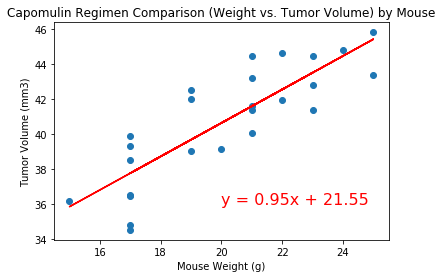

In [34]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

weight = Cap_Means_df.iloc[:,1]
avg_tum_vol = Cap_Means_df.iloc[:,3]
correlation = st.pearsonr(weight,avg_tum_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(Cap_Means_df["Weight (g)"], Cap_Means_df["Tumor Volume (mm3)"])
fit = slope * Cap_Means_df["Weight (g)"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Cap_Means_df["Weight (g)"],Cap_Means_df["Tumor Volume (mm3)"])
plt.title("Capomulin Regimen Comparison (Weight vs. Tumor Volume) by Mouse")
plt.plot(Cap_Means_df["Weight (g)"],fit,color="r")
plt.annotate(line_eq,(20, 36),fontsize=16,color="r")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()